In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 66.1 MB/s eta 0:00:00


#리뷰 제품
[모달] (w) Helsinki Pajama Set

MATERIAL
모달 70% 면 30% (40수)
조스라운지의 시그니처 모달 면 혼방 원단입니다.
부드러운 촉감과 튼튼한 내구성이 특징입니다

DETAILS
주머니 상하의
두께    보통
비침    없음
촉감    부드러움
신축    없음
무게    보통
표면 기모    없음


In [ ]:
# prompt: 현재 ipynb와 같은 경로에 있는 csv파일 데이터프레임으로 불러와

import pandas as pd

df = pd.read_csv('29cm_item_reviews.csv') # your_file.csv를 실제 파일명으로 변경하세요.
df


,아이템넘버,리뷰번호,리뷰내용,리뷰평점,작성자,작성일
0,824183,11814805,웜 오달이래서 샀는데 두껍진 않아요\n얇은데 톡톡한정도고 느낌도 좋고 디잔도 이뿌네...,5,cquee***,2025-01-10 23:04:52
1,824183,11809577,모달 재질이 좋아서 친구한테 생일선물로 했어요~~\n원래 가지고 있던 잠옷인지라 친...,5,kimmi***,2025-01-10 13:52:24
2,824183,11798017,생일에 잠옷을 선물하는 걸 좋아합니다. 내가 잘 안 사게 되는데 선물 받으면 집에서...,5,shintong***,2025-01-09 12:18:52
3,824183,11797501,평소 실내복을 입고 잤는데 언제부턴가 갑갑하게 느껴져 잠옷을 검색하다 조스라운지가 ...,5,arison***,2025-01-09 11:23:11
4,824183,11787727,"그동안 비싸서 망설였던 시간들이 아깝네요… 마감이며 핏, 소재 전부 완벽하고 다른 ...",5,lhy021***,2025-01-08 18:19:41
...,...,...,...,...,...,...
3200,824183,967912,면도 좋은것 같고 분홍색 라인이랑 단추가 포인트되서 귀여워욥 근데 윗단추가 하나 더...,4,minvi***,2020-10-18 17:55:57
3201,824183,963196,이 브랜드에서 반팔 파자마 사고 맘에 들어서 가을용으로 긴팔 구매했어요 ㅎㅎ\n재질...,5,je4***,2020-10-16 17:16:15
3202,824183,958915,꽃이 생각보다 성글게 그려져 있어요. 바탕 무늬도 생각치 못한 느낌이고요.. 조스라...,4,o***,2020-10-15 00:39:19
3203,824183,958589,"예쁘고 편하고, 기분좋아지는 잠옷이에요!",5,fech***,2020-10-14 22:58:16


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import koreanize_matplotlib

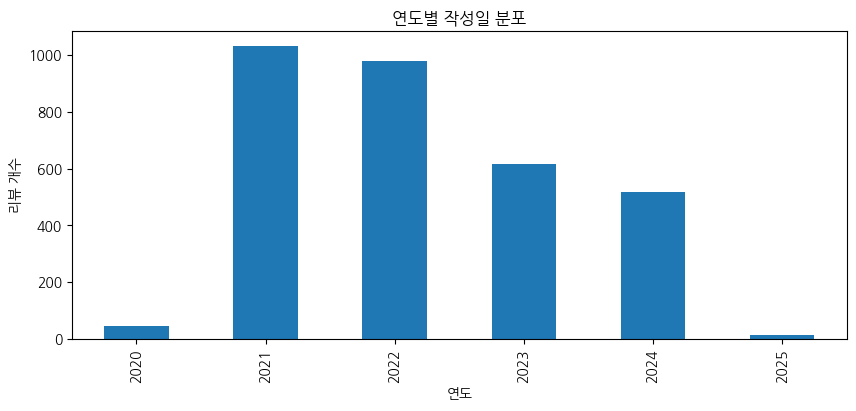

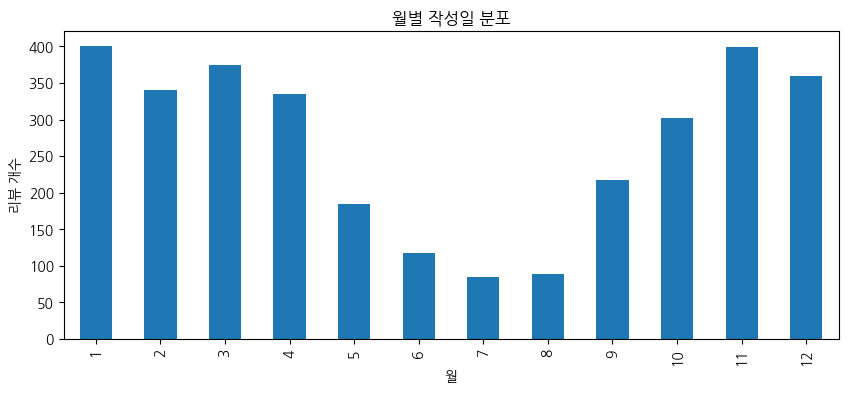

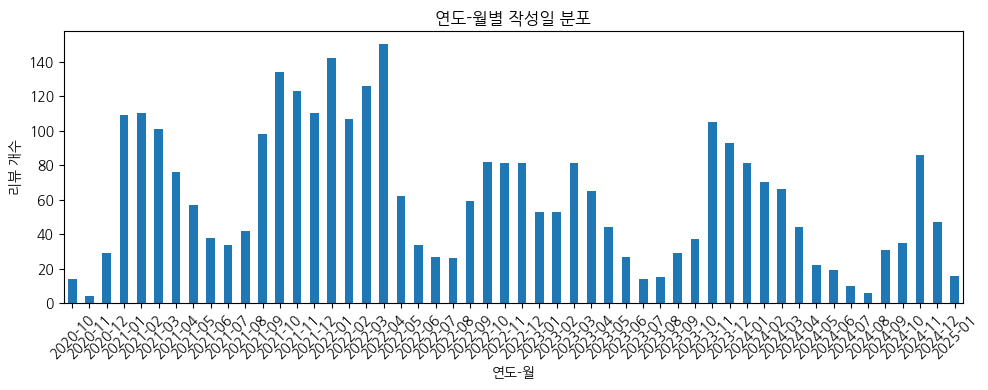

In [ ]:
# prompt: 작성일 컬럼의 데이터 분포도 시각화 연도별, 월별로 작성해주고, 또한 연도-월로도 작성해줘 figsize는 (10,4)
# '작성일' 컬럼을 datetime 객체로 변환
df['작성일'] = pd.to_datetime(df['작성일'])

# 연도별 분포
plt.figure(figsize=(10, 4))
df['작성일'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('연도별 작성일 분포')
plt.xlabel('연도')
plt.ylabel('리뷰 개수')
plt.show()

# 월별 분포
plt.figure(figsize=(10, 4))
df['작성일'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('월별 작성일 분포')
plt.xlabel('월')
plt.ylabel('리뷰 개수')
plt.show()


# 연도-월별 분포
df['연월'] = df['작성일'].dt.strftime('%Y-%m')
plt.figure(figsize=(10, 4))
df['연월'].value_counts().sort_index().plot(kind='bar')
plt.title('연도-월별 작성일 분포')
plt.xlabel('연도-월')
plt.ylabel('리뷰 개수')
plt.xticks(rotation=45) # x축 라벨 회전
plt.tight_layout() # 레이아웃 조정
plt.show()

In [ ]:
# prompt: 매년 가장 리뷰수가 많았던 월의 리뷰데이터를 각각 데이터프레임으로 저장해줘.
# 각 데이터프레임의 이름은 해당하는 연월을 활용해서 Y2024_M01 이런식으로 해줘


# 연도별 가장 리뷰가 많은 월 찾기
def yearly_max_review_month(df):
    yearly_max_reviews = {}
    for year in df['작성일'].dt.year.unique():
        year_df = df[df['작성일'].dt.year == year]
        monthly_counts = year_df['작성일'].dt.month.value_counts()
        max_month = monthly_counts.index[0]  # 가장 많은 리뷰를 가진 월
        yearly_max_reviews[year] = max_month
    return yearly_max_reviews


yearly_max_reviews = yearly_max_review_month(df)

# 연도별 가장 리뷰가 많은 월의 데이터를 데이터프레임으로 저장
for year, month in yearly_max_reviews.items():
    # 해당 연도와 월의 데이터 추출
    max_review_df = df[(df['작성일'].dt.year == year) & (df['작성일'].dt.month == month)]

    # 데이터프레임 이름 설정 (예: Y2024_M01)
    df_name = f"Y{year}_M{month:02d}"
    globals()[df_name] = max_review_df # globals()를 사용하여 동적으로 변수 생성
    print(f"{df_name}")

Y2025_M01
Y2024_M11
Y2023_M11
Y2022_M04
Y2021_M10
Y2020_M12


In [ ]:
# prompt: Y2024_M11
# Y2023_M11
# Y2022_M04
# Y2021_M10
# Y2020_M12
# 각 데이터프레임의 행 개수 출력. 그리고 합계

# 연도별 가장 리뷰가 많은 월의 데이터프레임 행 개수 출력 및 합계 계산
total_rows = 0
for year, month in yearly_max_reviews.items():
    df_name = f"Y{year}_M{month:02d}"
    if df_name in globals():
        num_rows = globals()[df_name].shape[0]
        print(f"{df_name}: {num_rows} rows")
        total_rows += num_rows
    else:
        print(f"{df_name} 데이터프레임이 존재하지 않습니다.")

print(f"\nTotal rows: {total_rows}")

Y2025_M01: 16 rows
Y2024_M11: 86 rows
Y2023_M11: 105 rows
Y2022_M04: 150 rows
Y2021_M10: 134 rows
Y2020_M12: 29 rows

Total rows: 520


In [ ]:
# prompt: Y2024_M11, Y2023_M11, Y2022_M04, Y2021_M10, Y2020_M12 데이터프레임을 모두 통합하되, 1번쨰 컬럼에 ['작성연월']로 해서 리뷰 작성일을 가져오는 데이터프레임 1개를 출력

# 데이터프레임들을 리스트에 저장
dfs = []
for year, month in yearly_max_reviews.items():
    df_name = f"Y{year}_M{month:02d}"
    if df_name in globals():
        dfs.append(globals()[df_name])

# 리스트에 있는 데이터프레임을 하나로 병합
combined_df = pd.concat(dfs, ignore_index=True)

# '작성일' 컬럼을 문자열로 변환하고, '작성연월' 컬럼 추가
combined_df['작성연월'] = combined_df['작성일'].dt.strftime('%Y-%m')

# '작성연월' 컬럼을 첫 번째 컬럼으로 이동
cols = combined_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('작성연월')))
combined_df = combined_df[cols]

combined_df

,작성연월,아이템넘버,리뷰번호,리뷰내용,리뷰평점,작성자,작성일
0,2025-01,824183,11814805,웜 오달이래서 샀는데 두껍진 않아요\n얇은데 톡톡한정도고 느낌도 좋고 디잔도 이뿌네...,5,cquee***,2025-01-10 23:04:52
1,2025-01,824183,11809577,모달 재질이 좋아서 친구한테 생일선물로 했어요~~\n원래 가지고 있던 잠옷인지라 친...,5,kimmi***,2025-01-10 13:52:24
2,2025-01,824183,11798017,생일에 잠옷을 선물하는 걸 좋아합니다. 내가 잘 안 사게 되는데 선물 받으면 집에서...,5,shintong***,2025-01-09 12:18:52
3,2025-01,824183,11797501,평소 실내복을 입고 잤는데 언제부턴가 갑갑하게 느껴져 잠옷을 검색하다 조스라운지가 ...,5,arison***,2025-01-09 11:23:11
4,2025-01,824183,11787727,"그동안 비싸서 망설였던 시간들이 아깝네요… 마감이며 핏, 소재 전부 완벽하고 다른 ...",5,lhy021***,2025-01-08 18:19:41
...,...,...,...,...,...,...,...
515,2020-12,824183,1123249,옷은 너무 예쁘고 좋은데요....ㅜㅜ 사이즈 선택하는게 없어서 쫌 불안하다 했더니 ...,4,lmw4***,2020-12-11 18:10:48
516,2020-12,824183,1121881,너무 귀여운 패턴 ... 아직도 잘입고있답니다. 겨울엔 근데 얇아서 조금 춥구요 봄...,5,tjdk***,2020-12-11 10:20:14
517,2020-12,824183,1115380,재질 부드럽고 입었을 때 편안하구요. 막빨아도 괜찮네요~ 디자인도 은은하니 마음에 ...,5,hj1***,2020-12-09 17:22:35
518,2020-12,824183,1105434,친구 생일선물로 선물해줬어요-\n넘 귀엽데요! \n좋은 선물해주고 싶어서 한참을 골...,4,leey***,2020-12-06 15:30:24


In [ ]:
# prompt: stopwords-ko.txt라는 불용어 처리 파일을 활용해서 Y2024_M11, Y2023_M11, Y2022_M04, Y2021_M10, Y2020_M12 5개 데이터프레임의 리뷰내용에서 불용어 처리해줘

# 불용어 처리 함수 정의
def remove_stopwords(text, stopwords):
    tokens = text.split()
    cleaned_tokens = [token for token in tokens if token not in stopwords]
    return " ".join(cleaned_tokens)

# 불용어 파일 로드
with open('stopwords-ko.txt', 'r', encoding='utf-8') as f:
    stopwords = [line.strip() for line in f]

# 각 데이터프레임에 대해 불용어 처리
for year, month in yearly_max_reviews.items():
    df_name = f"Y{year}_M{month:02d}"
    if df_name in globals():
        globals()[df_name]['cleaned_review'] = globals()[df_name]['리뷰내용'].apply(lambda x: remove_stopwords(str(x), stopwords))
        print(f"{df_name} 불용어 처리 완료")
    else:
        print(f"{df_name} 데이터프레임이 존재하지 않습니다.")

Y2025_M01 불용어 처리 완료
Y2024_M11 불용어 처리 완료
Y2023_M11 불용어 처리 완료
Y2022_M04 불용어 처리 완료
Y2021_M10 불용어 처리 완료
Y2020_M12 불용어 처리 완료


In [ ]:
# prompt: Y2024_M11, Y2023_M11, Y2022_M04, Y2021_M10, Y2020_M12
# 5개의 데이터프레임의 ['리뷰내용'] 컬럼으로 TF-IDF로 5개의 주제 NMF로 토픽모델링하고 각 토픽별 주요키워드와 가중치 20개씩 추출해.
# 그리고 각 데이터프레임뒤에 _MODELING 붙여서 CSV파일로 저장해줘.


def topic_modeling(df, n_topics=5, max_features=1000, max_df=0.95, min_df=2):
    tfidf_vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, max_features=max_features)
    tfidf = tfidf_vectorizer.fit_transform(df['리뷰내용'])
    nmf_model = NMF(n_components=n_topics, random_state=42)
    nmf_model.fit(tfidf)

    feature_names = tfidf_vectorizer.get_feature_names_out()
    top_words = {}
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words[topic_idx] = [(feature_names[i], topic[i]) for i in topic.argsort()[:-21:-1]] # 상위 20개 키워드
    return top_words

# 데이터프레임 리스트 (Y2024_M11, Y2023_M11, Y2022_M04, Y2021_M10, Y2020_M12)
df_names = ['Y2024_M11', 'Y2023_M11', 'Y2022_M04', 'Y2021_M10', 'Y2020_M12']

for df_name in df_names:
    if df_name in globals() and '리뷰내용' in globals()[df_name].columns:
      try:
        top_words = topic_modeling(globals()[df_name])

        # 결과 저장
        result_df = pd.DataFrame()
        for topic_idx, words in top_words.items():
            topic_df = pd.DataFrame(words, columns=['keyword', 'weight'])
            topic_df['topic'] = topic_idx
            result_df = pd.concat([result_df, topic_df])

        result_df.to_csv(f'{df_name}_MODELING.csv', index=False, encoding='utf-8-sig')
        print(f"{df_name}_MODELING.csv 파일이 저장되었습니다.")
      except Exception as e:
        print(f"Error processing {df_name}: {e}")
    else:
        print(f"DataFrame '{df_name}' not found or '리뷰내용' column missing.")

Y2024_M11_MODELING.csv 파일이 저장되었습니다.
Y2023_M11_MODELING.csv 파일이 저장되었습니다.
Y2022_M04_MODELING.csv 파일이 저장되었습니다.
Y2021_M10_MODELING.csv 파일이 저장되었습니다.
Y2020_M12_MODELING.csv 파일이 저장되었습니다.


gpt 프롬프트

다음의 CSV 파일은 1개의 파자마 제품에 대해, 2020년 부터 2024년까지 매년 가장 리뷰수가 많았던 월의 리뷰데이터만 추출하고 TF-IDF로 5개의 주제 NMF로 토픽모델링하고 각 토픽별 주요키워드와 가중치 20개씩 추출한 결과물이다. 불용어는 처리되었다.

파일의 이름은 리뷰가 해당하는 연도와 월로 네이밍했다. Y2024_M01이라면 2024년 1월의 토픽모델링한 결과이다.

이를 참고해서 매년 리뷰수가 많았던 월의 리뷰의 내용들의 5개 토픽들이 어떤 변화를 보이고 있는지 분석해달라.

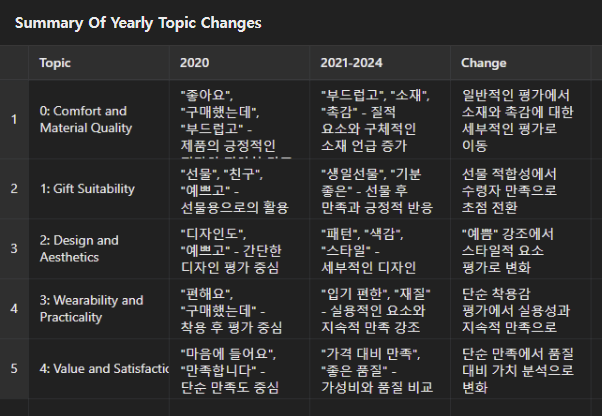

종합 결론

리뷰의 초반은 제품의 전반적인 긍정적 반응과 선물용도로 적합하다는 평가가 주를 이루었음.

시간이 지날수록 **세부적인 제품 특성(소재, 디자인, 실용성)과 소비자 만족도(가성비, 지속적 만족)에 대한 구체적인 평가가 중**요해짐.

이는 소비자들이 점차 고급화된 요구를 가지며, 보다 구체적인 제품 특성을 기대하고 있음을 보여줌


선물 적합성 (연말선물로 좋아요, 생일선물로 좋아요) → 수령자 만족 (아버지가 만족해요, 친구가 좋아해요)로 변화